In [2]:
import sys
import warnings
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')

import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization

from spectral_cube import SpectralCube

from quicklook_multicolorbar import quicklook

In [88]:
fn = '/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_8_corrected21.fits'
fh = SpectralCube.read(fn)
fh = fh.with_spectral_unit(u.km / u.s, velocity_convention='radio')
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh.header)
    
ww

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD'  
CRVAL : 290.9168499983  14.51817221939  71036.390340962  
CRPIX : 401.0  401.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -3.888888888889e-06  3.888888888889e-06  -197.99509273065  
NAXIS : 800  800  200

In [10]:
def w51north_plot():

    fig = pl.figure(figsize=(9,9))
    ax = pl.subplot(projection=ww)
    im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
    cb = pl.colorbar(mappable=im)
    cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)
    #cb.set_ticks([np.nanmin(fh[0].data), -0.005, 0.00 ,0.005, 0.01, 0.015, 0.020, 0.025])
    ax.axis([6750,7750,6750,7750])

    radesys = ww.wcs.radesys
    
    _ = ax.set_xlabel(f"Right Ascension {ww.wcs.radesys}")
    _ = ax.set_ylabel(f"Declination {ww.wcs.radesys}")
    
    tick_fontsize = 14
    fontsize = 16
    ra = ax.coords['ra']
    ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra.ticklabels.set_fontsize(tick_fontsize)
    ra.set_ticklabel(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    dec.set_ticklabel(exclude_overlapping=True)
    
    return ax

AttributeError: 'AxesImage' object has no property 'projection'

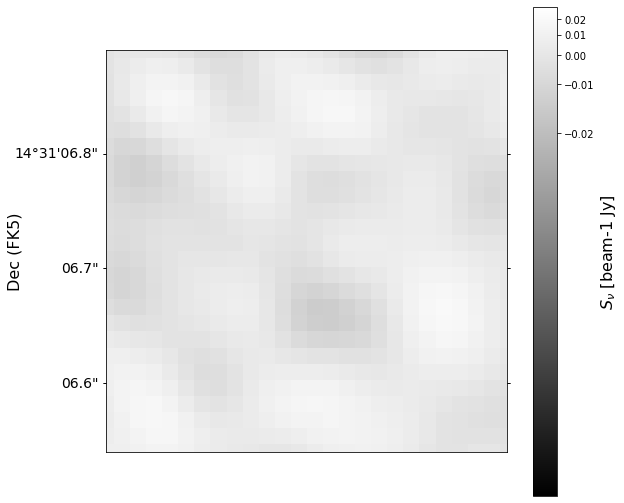

In [7]:
#unknown region
cen = fh.shape[1]/2, fh.shape[2]/2

ax = w51north_plot()
ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])

aatrox = ax.imshow(fh[0].data, projection='wcs', cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))


#[cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105]

In [6]:
pip install pvextractor

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


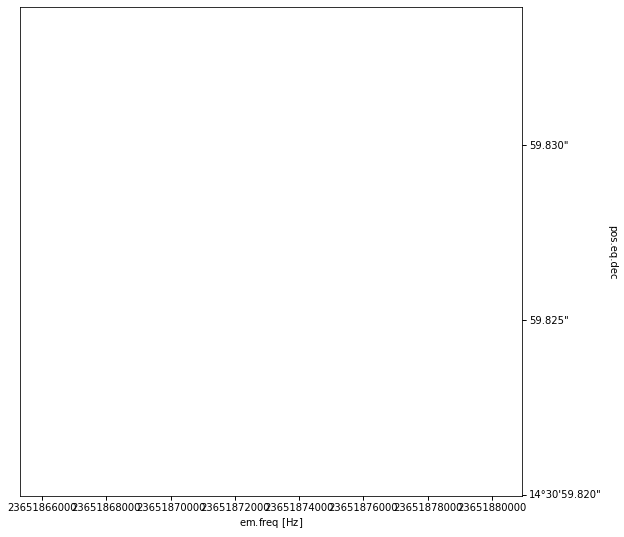

In [34]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits
wcs = WCS(fh.header)
fig = pl.figure(figsize=(9,9))
ax = pl.subplot(projection=ww, slices=(14 ,'y', 'x'))

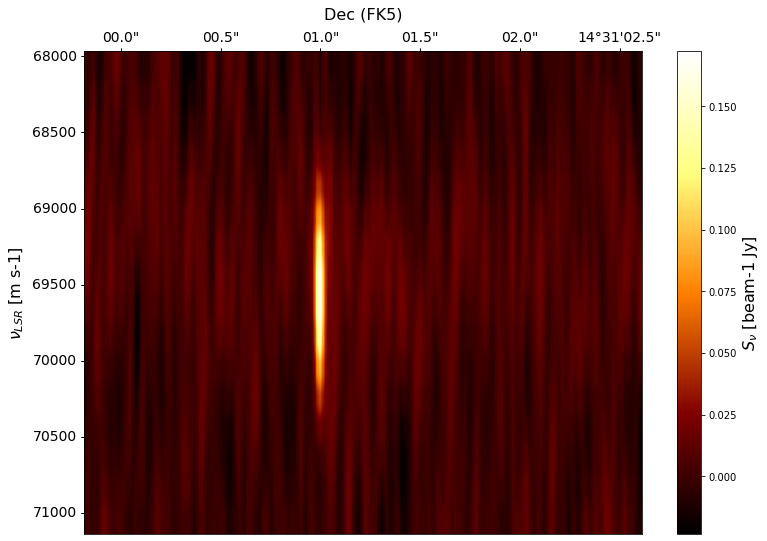

In [102]:
import sys
import warnings
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')

import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization

from spectral_cube import SpectralCube

fn = '/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_8_corrected21.fits'
fh = SpectralCube.read(fn)
fh = fh.with_spectral_unit(u.km / u.s, velocity_convention='radio')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh.header)

from pvextractor import Path
from pvextractor import extract_pv_slice
from spectral_cube import SpectralCube
path1 = Path([(637., 366.), (637., 350.)])

pv = extract_pv_slice(fh, path1, wcs=ww)

fig = pl.figure(figsize=(10,7))
ax = pl.subplot(projection=ww, slices =(50, 'x','y'))

radesys = ww.wcs.radesys

_ = ax.set_xlabel(f"RA (FK5)", fontsize = 16)    
_ = ax.set_ylabel("$\\nu_{LSR}$ [m s-1]", fontsize = 16)
    
tick_fontsize = 14
fontsize = 16
# ra = ax.coords['ra']
# ra.set_major_formatter('hh:mm:ss.s')
# ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
# ra.ticklabels.set_fontsize(tick_fontsize)
radesys = ww.wcs.radesys

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=1.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)

vrad = ax.coords['vrad']
vrad.ticklabels.set_fontsize(tick_fontsize)
pl.tight_layout()
    

im = ax.imshow(pv.data.transpose(), cmap='afmhot', norm=visualization.simple_norm(pv.data, stretch='linear', max_percent=100.00), aspect = 'auto')
cb = pl.colorbar(mappable=im)
cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)

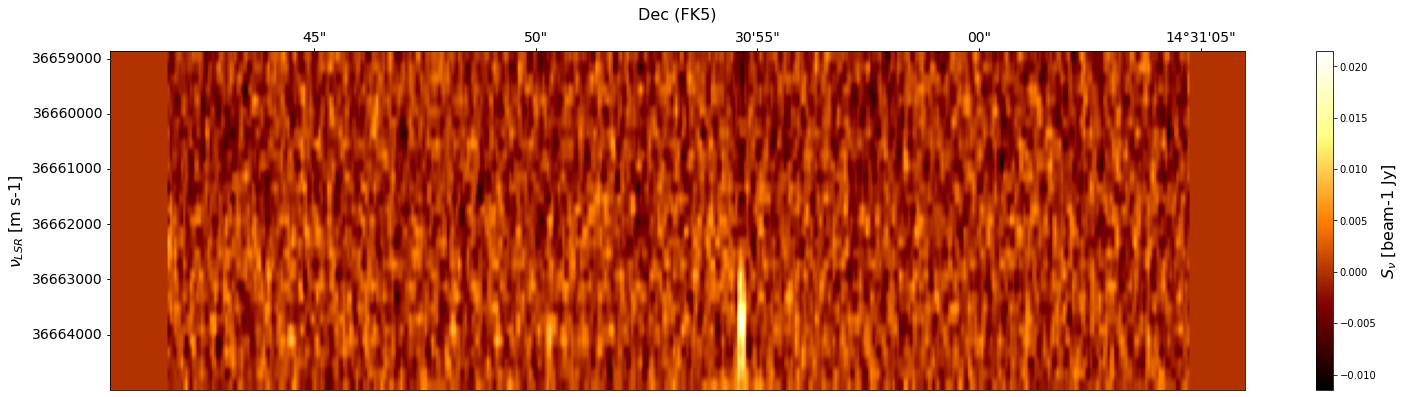

In [106]:
import sys
import warnings
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')

import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization

from spectral_cube import SpectralCube

fn = '/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_38.fits'
fh = SpectralCube.read(fn)
fh = fh.with_spectral_unit(u.km / u.s, velocity_convention='radio')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh.header)

from pvextractor import Path
from pvextractor import extract_pv_slice
from spectral_cube import SpectralCube
path1 = Path([(619., 361.), (649., 353.)])

pv = extract_pv_slice(fh, path1)

fig = pl.figure(figsize=(20,5))
ax = pl.subplot(projection=ww, slices =(50, 'x','y'))

_ = ax.set_ylabel("$\\nu_{LSR}$ [m s-1]", fontsize = 16)
    
tick_fontsize = 14
fontsize = 16
# ra = ax.coords['ra']
# ra.set_major_formatter('hh:mm:ss.s')
# ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
# ra.ticklabels.set_fontsize(tick_fontsize)
radesys = ww.wcs.radesys

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=1.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)

vrad = ax.coords['vrad']
vrad.ticklabels.set_fontsize(tick_fontsize)
pl.tight_layout()

im = ax.imshow(pv.data.transpose(), cmap='afmhot', norm=visualization.simple_norm(pv.data, stretch='linear', max_percent=100.00), aspect ='auto')
cb = pl.colorbar(mappable=im)
cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)
pl.tight_layout()





(-0.5, 23.5)


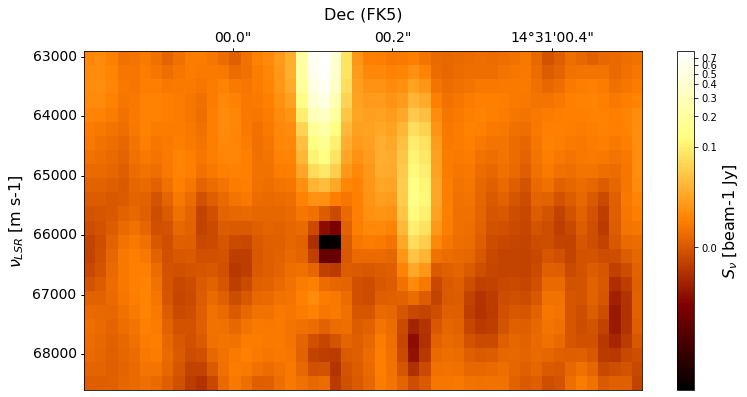

In [13]:
import sys
import warnings
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')

import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization

from spectral_cube import SpectralCube

fn = '/orange/adamginsburg/w51/vla/19A-254/derod/W51North_spw_56_corrected2.fits'
fh = SpectralCube.read(fn)
fh = fh.with_spectral_unit(u.km / u.s, velocity_convention='radio')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh.header)

from pvextractor import Path
from pvextractor import extract_pv_slice
from spectral_cube import SpectralCube
path1 = Path([(616., 360.), (630., 358.), (632., 358.), (632., 357.), (633., 356.), (634., 356.), (637., 357.), (638., 356.)])

pv = extract_pv_slice(fh, path1)

fig = pl.figure(figsize=(10,5))
ax = pl.subplot(projection=ww, slices =(50, 'x','y'))

radesys = ww.wcs.radesys

_ = ax.set_xlabel(f"RA (FK5)", fontsize = 16)    
_ = ax.set_ylabel("$\\nu_{LSR}$ [m s-1]", fontsize = 16)
    
tick_fontsize = 14
fontsize = 16
# ra = ax.coords['ra']
# ra.set_major_formatter('hh:mm:ss.s')
# ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
# ra.ticklabels.set_fontsize(tick_fontsize)
radesys = ww.wcs.radesys

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=1.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)

vrad = ax.coords['vrad']
vrad.ticklabels.set_fontsize(tick_fontsize)
pl.tight_layout()
    

im = ax.imshow(pv.data.transpose(), cmap='afmhot', norm=visualization.simple_norm(pv.data, stretch='log', max_percent=100.00), aspect = 'auto')
cb = pl.colorbar(mappable=im)
cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)
# vrad.set_ticks([np.nanmin(fh[0].data), 63500]*u.m/u.s, ["t","t"])
# ax.set_yticklabels(["t","t"])
pl.tight_layout()
#ax.contour(pv.data, levels=np.logspace(-4.7, 7, 10), colors='white', alpha=0.5)



In [54]:
from pvextractor import Path
from pvextractor import extract_pv_slice
from spectral_cube import SpectralCube
path1 = Path([(619., 361.), (649., 353.)])

pv = extract_pv_slice(fh, path1)

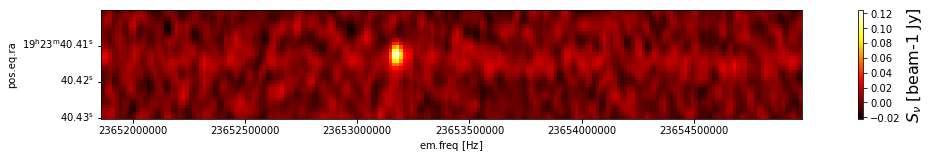

In [60]:
fig = pl.figure(figsize=(20,2))
ax = pl.subplot(projection=ww, slices =('y', 50 ,'x'))


im = ax.imshow(pv.data.transpose(), cmap='hot', norm=visualization.simple_norm(pv.data, stretch='linear', max_percent=100.00))
cb = pl.colorbar(mappable=im)
cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)
pl.tight_layout()


# _ = ax.set_ylabel(f"Offset Position ('')", fontsize = 16)
# _ = ax.set_xlabel(f"VLSR (km s-1)", fontsize = 16)

# y,x = pv.shape
# res = .74


# axis
# rest_frequency = 
#extent=(0,x/res ,0,y/res)




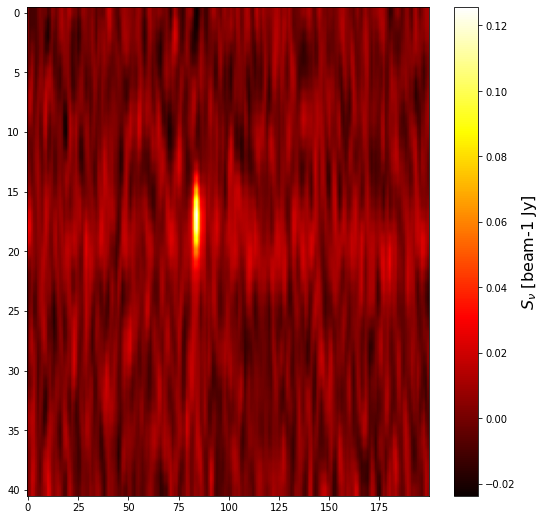

In [53]:
from pvextractor import Path
from pvextractor import extract_pv_slice
from spectral_cube import SpectralCube
path1 = Path([(654., 352.), (614., 362.)])

pv = extract_pv_slice(fh, path1)

fig = pl.figure(figsize=(9,9))
ax = pl.subplot()


im = ax.imshow(pv.data.transpose(), cmap='hot', norm=visualization.simple_norm(pv.data, stretch='linear', max_percent=100.00), aspect='auto')
cb = pl.colorbar(mappable=im)
cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)

INFO: Auto-setting vmin to -1.988e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.718e-02 [aplpy.core]


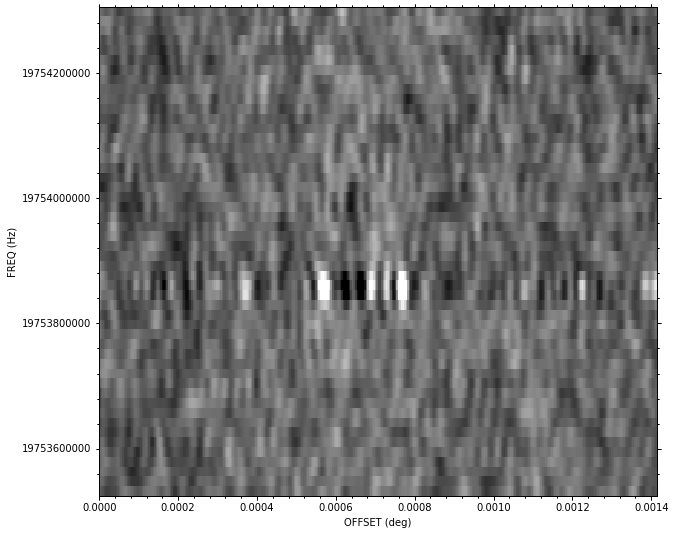

In [11]:
import aplpy
F2 = aplpy.FITSFigure(pv)
F2.show_grayscale(aspect='auto')

In [49]:
pip install aplpycolorbar

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.2 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 102.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 83.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 93.0 MB/s eta 0:00:01
     |████████████████████████████████| 169 kB 105.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 89.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 94.6 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use 

In [94]:
file = None
pv.writeto('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Matranspose-Starforming-Regions/notebooks/test.fits')

OSError: File '/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/test.fits' already exists.

In [37]:
SpectralCube.read('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/test.fits')

FITSReadError: Data should be 3- or 4-dimensional

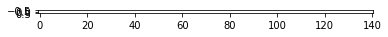

In [44]:
pl.imshow(pv.data)

In [45]:
print(pv.data)

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sys
import warnings
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')

import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization

from spectral_cube import SpectralCube

from quicklook_multicolorbar import quicklook

fn = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
fh = SpectralCube.read(fn, format='casa_image')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh[0].header)